# Machine Learning: 4th Data Science Project
#### By Lina Santoyo

#### This dataset includes 17 variables related to a direct marketing campaign of a Portuguese banking institution. The attributes include variables such as age, job, marital status, education, etc. The goal of this project is to predict if an individual will become a customer by building a machine learning clasification model.


### 1. Importing libraries and data set

In [612]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import sklearn
from sklearn import datasets 
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as sklm
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, train_test_split
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv((r"db/bankk.csv"))
print(df.shape)
df.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


###  2. Exploratory data analysis

In [387]:
# Finding nulls, unknowns and having a general description of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [388]:
unknown_list = {}

for column in df.columns:
    if(df[column].dtype=='object'):
        unknown = df[df[column]=='unknown']
        test = unknown[column].value_counts()
        unknown_list[column]= test
unknown_list

{'job': unknown    288
 Name: job, dtype: int64,
 'marital': Series([], Name: marital, dtype: int64),
 'education': unknown    1857
 Name: education, dtype: int64,
 'default': Series([], Name: default, dtype: int64),
 'housing': Series([], Name: housing, dtype: int64),
 'loan': Series([], Name: loan, dtype: int64),
 'contact': unknown    13020
 Name: contact, dtype: int64,
 'month': Series([], Name: month, dtype: int64),
 'poutcome': unknown    36959
 Name: poutcome, dtype: int64,
 'y': Series([], Name: y, dtype: int64)}

### 2.1 Analizing personal data of the clients
##### Age, Job, Marital satus, Education level and Loan

### 2.1.1 AGE

Text(0.5, 1.0, 'Age boxplot')

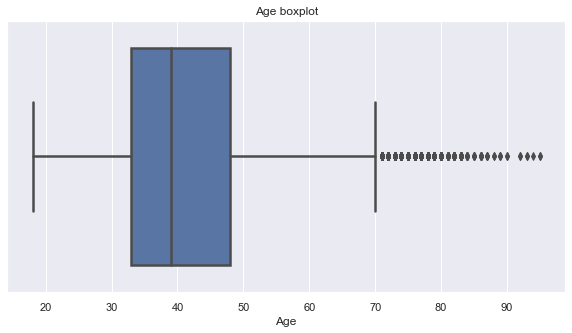

In [389]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10,5))
sns.boxplot(x=df["age"], linewidth=2.5)
plt.xlabel("Age")
plt.title("Age boxplot")



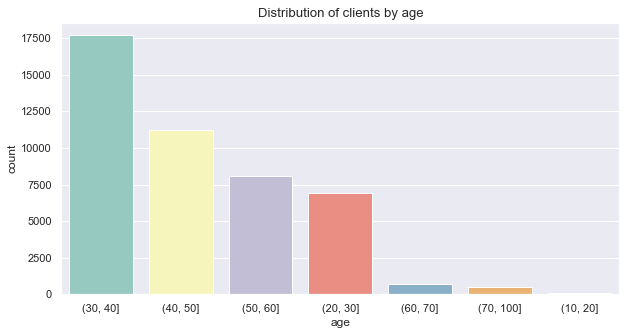

In [390]:
bins = [10, 20, 30, 40, 50, 60, 70, 100]
cats = pd.cut(df.age, bins)
plt.figure(figsize = (10,5))
ax = sns.countplot(cats, palette= "Set3",
                   order = cats.value_counts().index)
sns.set(font_scale=1.1)
ax.set_title('Distribution of clients by age')
value=round(cats.value_counts()/len(cats)*100,2)


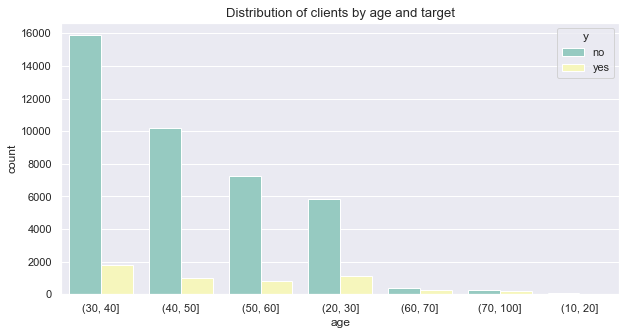

In [613]:
bins = [10, 20, 30, 40, 50, 60, 70, 100]
cats = pd.cut(df.age, bins)
plt.figure(figsize = (10,5))
ax = sns.countplot(cats, palette= "Set3",hue=df["y"],
                   order = cats.value_counts().index)
sns.set(font_scale=1.1)
ax.set_title('Distribution of clients by age and target')
value=round(cats.value_counts()/len(cats)*100,2)

<AxesSubplot:xlabel='age', ylabel='Density'>

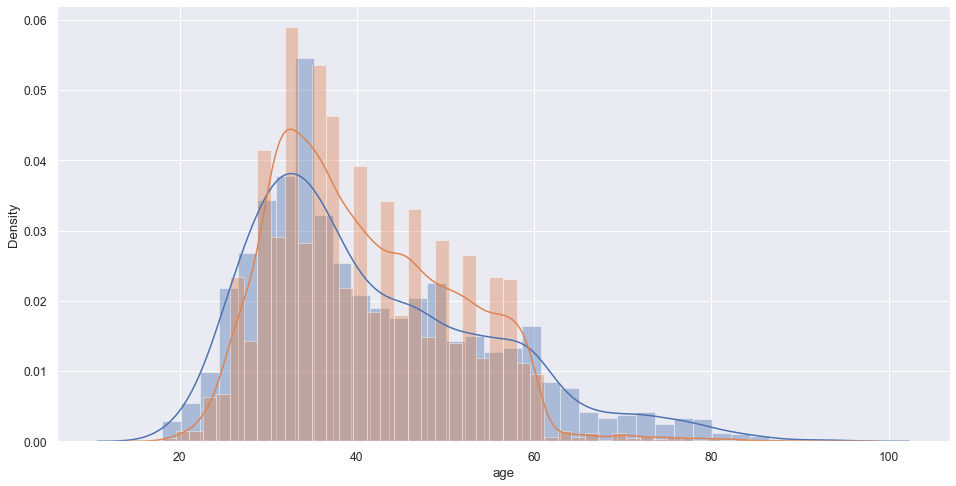

In [392]:
age = df[df['y']== 'yes']
age_no= df[df['y']=='no']
sns.distplot(age['age'], label='Si')
sns.distplot(age_no['age'], label='No')

In [393]:
Age_y={}
a=10
while True:
    if a==100:
        break
    b=a+10
    df_filt=df[(df["y"]=='yes')]
    df_filt=df_filt[(df_filt["age"]>a) & (df_filt["age"]<b)]
    comp=round(len(df_filt)/len(df[(df["age"]>a) & (df["age"]<b)])*100,2)
    inter=str(a)+"-"+str(b)
    print(comp, "% of people between ",inter, "suscribed to the bank")
    edad_y[inter]=comp
    a+=10

38.3 % of people between  10-20 suscribed to the bank
17.29 % of people between  20-30 suscribed to the bank
10.38 % of people between  30-40 suscribed to the bank
9.19 % of people between  40-50 suscribed to the bank
9.54 % of people between  50-60 suscribed to the bank
42.11 % of people between  60-70 suscribed to the bank
45.66 % of people between  70-80 suscribed to the bank
40.0 % of people between  80-90 suscribed to the bank
71.43 % of people between  90-100 suscribed to the bank


### Observations of "AGE"

* This feature doesn't have a normal distribution.

* 65% of the clients are between 30 and 50 years and 40% of them are between 30 y 40.

* When we filter by target==1, we can see how a half of older people become clients

* There are no nulls or unknown values.

#### What can we say about the distribution by age and target?
Both distributions are pretty similar although from 60 years and older, we can see how the majority said yes, that tell us that in this case outliers are important and we should keep them because they are providing important information and they can help the classifier to work better.


### 2.1.2. Type of Job

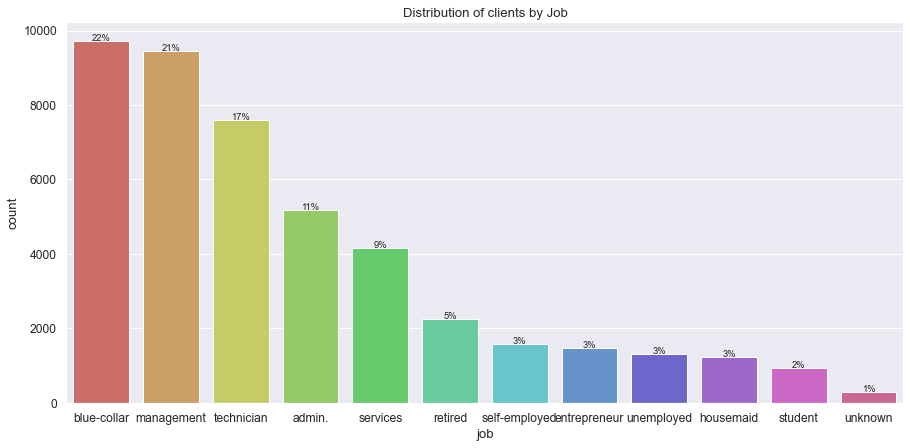

In [394]:
plt.figure(figsize = (15,7))
jobx = sns.countplot(df["job"], palette="hls",
                   order = df["job"].value_counts().index)
jobx.set_title('Distribution of clients by Job')
sns.set(font_scale=0.78)
value=round(df["job"].value_counts()/len(df["job"])*100,2)

for p in jobx.patches:
    height = p.get_height()
    jobx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),
            ha="center") 

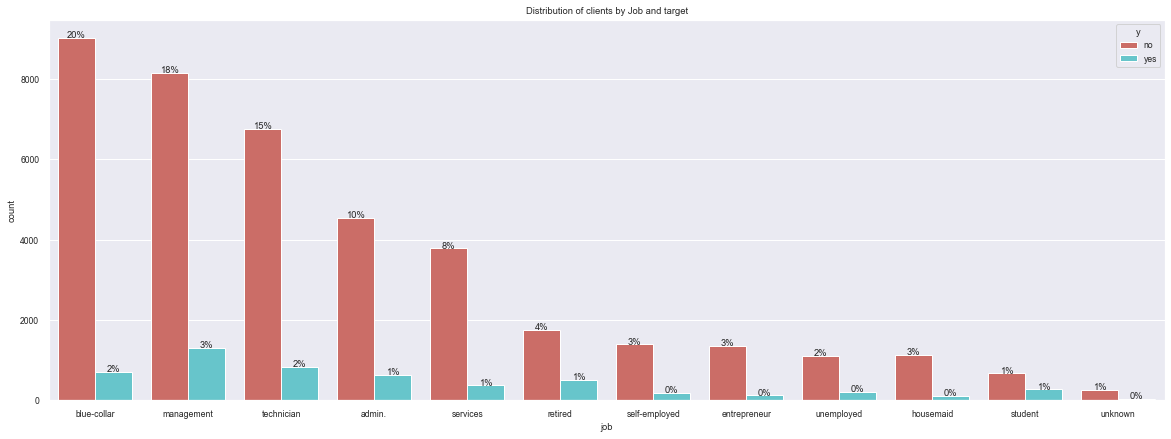

In [395]:
plt.figure(figsize = (20,7))
jobx = sns.countplot(df["job"], palette="hls", hue=df['y'],
                   order = df["job"].value_counts().index)
jobx.set_title('Distribution of clients by Job and target')
sns.set(font_scale=0.78)
value=round(df["job"].value_counts()/len(df["job"])*100,2)
for p in jobx.patches:
    height = p.get_height()
    jobx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),
            ha="center") 
    


In [396]:
job_y={}
for i in df["job"].unique():
    df_filt=df[(df["y"]=='yes') & (df["job"]==i)]
    comp=round(len(df_filt)/len(df[df["job"]==i])*100,2)
    print(comp, "% of people working in",i, "bougth the product")
    job_y[i]=comp

13.76 % of people working in management bougth the product
11.06 % of people working in technician bougth the product
8.27 % of people working in entrepreneur bougth the product
7.27 % of people working in blue-collar bougth the product
11.81 % of people working in unknown bougth the product
22.79 % of people working in retired bougth the product
12.2 % of people working in admin. bougth the product
8.88 % of people working in services bougth the product
11.84 % of people working in self-employed bougth the product
15.5 % of people working in unemployed bougth the product
8.79 % of people working in housemaid bougth the product
28.68 % of people working in student bougth the product


### Observations of "Job"

* This feature doesn't have a normal distribution.

* The vast mayority work as a blue-collar or management.

* When we filter by target==1, we can see how even if there are more blue-collars, the proportion of clients getting the product is bigger for the managements, technicians and admins.

* Unknowns values are not very significant.

#### What type of job do the people who said yes have?

64% of the clients are Blue collar, Administrators and technicians

The ones to acquire the product the most are Student and Retired, followed by Unemployed, Admin y Management.

The quantity of nulls is not significant 0,8%, but 11% are from  “yes” on target

### 2.1.3 Marital Status

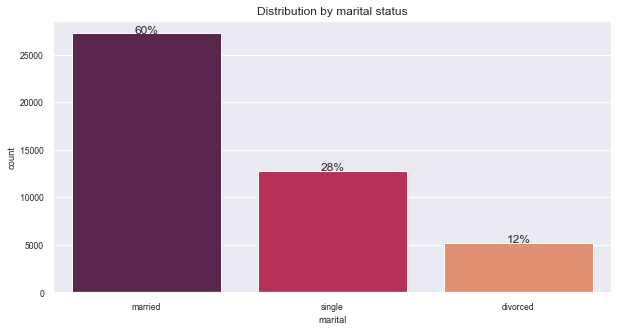

In [397]:
plt.figure(figsize = (10,5))
maritx = sns.countplot(df["marital"], palette="rocket",
                   order = df["marital"].value_counts().index)
sns.set(font_scale=1)
maritx.set_title('Distribution by marital status')
value=round(df["marital"].value_counts()/len(df["marital"])*100,2)

for p in maritx.patches:
    height = p.get_height()
    maritx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),
            ha="center") 


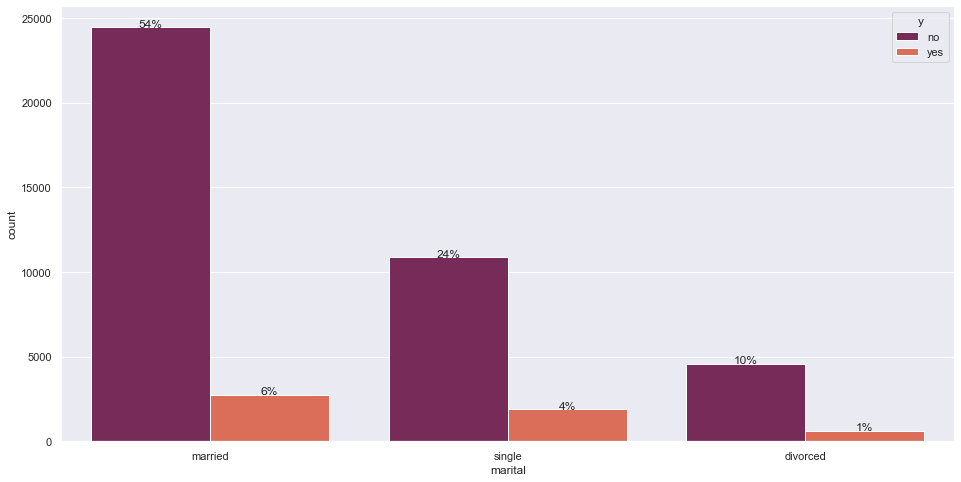

In [398]:
ax = sns.countplot(data=df, x='marital',palette="rocket", hue='y')
total = float(len(df)) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),
            ha="center") 
plt.show()

In [399]:
marital_y={}
for i in df["marital"].unique():
    df_filt=df[(df["y"]=='yes') & (df["marital"]==i)]
    ratio=round(len(df_filt)/len(df[df["marital"]==i])*100,2)
    print(ratio, "% of",i, "say yes to the product")
    marital_y[i]=ratio

10.12 % of married say yes to the product
14.95 % of single say yes to the product
11.95 % of divorced say yes to the product


### Observations of "Marital Status"


* The mayority is married.

* Unknowns values are not significant.

#### What is the marital status of the people who became a client?

Even if we can see how the “married” category are the ones who have the most positive target, the one that had the majority bought were the single ones, proportionally. 



### 2.1.4 Education


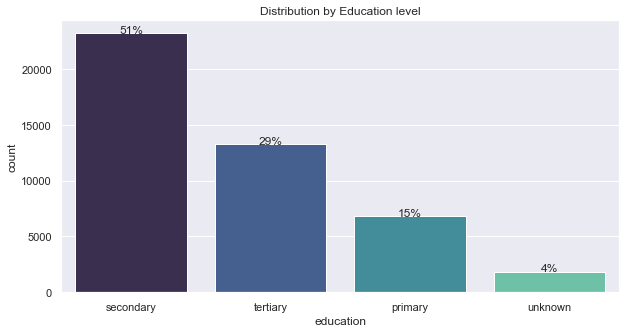

In [400]:
plt.figure(figsize = (10,5))
edux = sns.countplot(df["education"], palette="mako", #hue=df["y"], 
                     #hue=(df["job"]=="blue-collar"),                 
                   order = df["education"].value_counts().index)
edux.set_title('Distribution by Education level')
value=round(df["education"].value_counts()/len(df["education"])*100,2)
for p in edux.patches:
    height = p.get_height()
    edux.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),
            ha="center") 

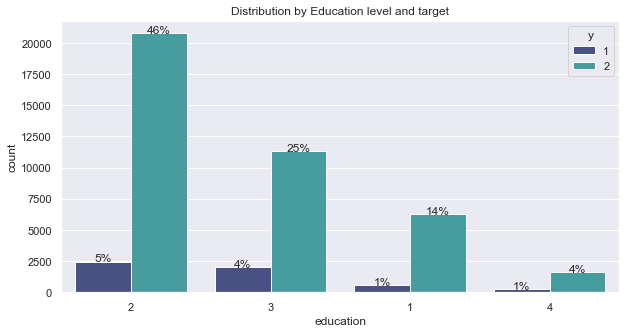

In [590]:
plt.figure(figsize = (10,5))
edux = sns.countplot(df["education"], palette="mako", hue=df["y"],                  
                   order = df["education"].value_counts().index)
edux.set_title('Distribution by Education level and target')
value=round(df["education"].value_counts()/len(df["education"])*100,2)
for p in edux.patches:
    height = p.get_height()
    edux.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format((height/total)*100),
            ha="center") 
    


### Observations of "Education"


* The  vast majority has just secondary education.

* Unknowns values are not significant.

#### What is the education level of the people who became a client?

Even if close to the 50% of people has secondary education, the proportion of people buying the product with tertiary education is way bigger


### 2.1.5 Loan


Text(0.5, 1.0, 'Personal Loan')

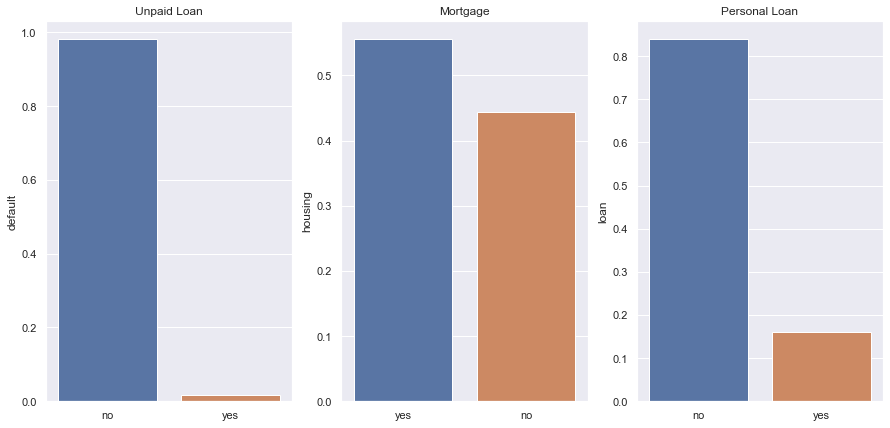

In [402]:
f, axes = plt.subplots(1, 3, figsize=(15,7))

sns.barplot(x=df['default'].value_counts().index, y=df['default'].value_counts(normalize=True), ax=axes[0]).set_title("Unpaid Loan")
sns.barplot(x=df['housing'].value_counts().index, y=df['housing'].value_counts(normalize=True), ax=axes[1]).set_title("Mortgage")
sns.barplot(x=df['loan'].value_counts().index, y=df['loan'].value_counts(normalize=True), ax=axes[2]).set_title("Personal Loan")

### Observations of "Loan"


* The mayority has unpaid loans

* Unknowns values are not significant.

#### Do the people who became a client have a loan?

Here we can see hoy the biggest proportion of new clients have alredy a loan, particularly a Mortgage



### 2.2 Analizing data regarding the campaing


Text(0.5, 1.0, 'Day of last contact')

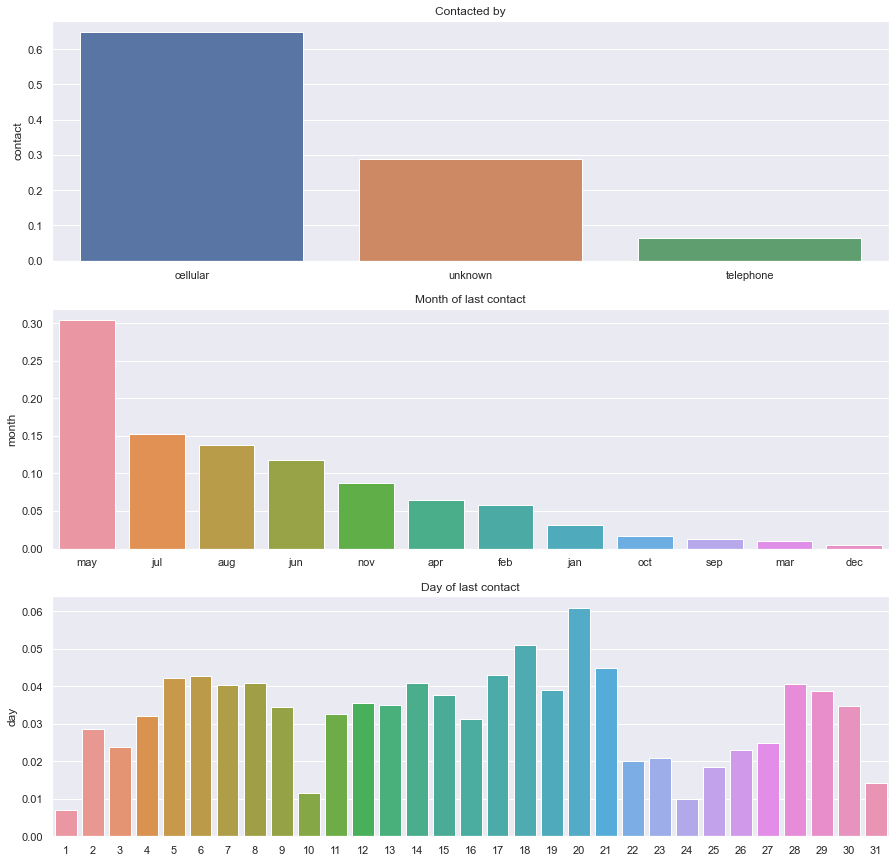

In [403]:
f, axes = plt.subplots(3, 1, figsize=(15,15))
sns.barplot(x= df['contact'].value_counts().index, y= df['contact'].value_counts(normalize=True), ax=axes[0]).set_title("Contacted by")
sns.barplot(x= df['month'].value_counts().index, y= df['month'].value_counts(normalize=True), ax=axes[1]).set_title("Month of last contact")
sns.barplot(x= df['day'].value_counts().index, y= df['day'].value_counts(normalize=True), ax=axes[2]).set_title("Day of last contact")

#### Observations of date of contact

* Most of the contacts were by cellphone

* May was the month with most last contacts

* Distribution of days was pretty regular (we might consider dropping this column for analisis) 

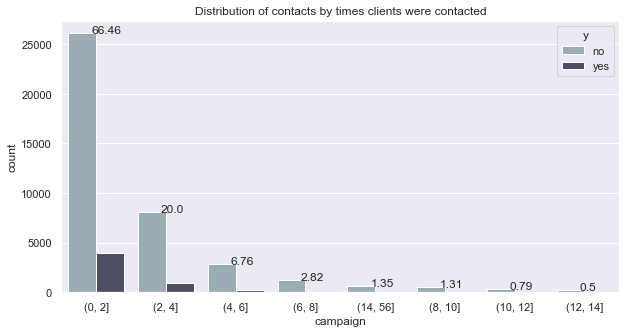

In [461]:
bins2=[0,2,4,6,8,10,12,14,56]
campaign_cats = pd.cut(df.campaign, bins2)
plt.figure(figsize = (10,5))
ax = sns.countplot(campaign_cats, palette="bone_r", hue=df["y"],
                      order = campaign_cats.value_counts().index)
ax.set_title('Distribution of contacts by times clients were contacted')
value=round(campaign_cats.value_counts()/len(campaign_cats)*100,2)
for p, label in zip(ax.patches, value):
    ax.annotate(label, (p.get_x()+0.33, p.get_height()+0.25))

### 2.3 Analizing the target.

We need to know better the target and its distribution, in this case, since is a categorical variable we have to transform it into numerical as well. 

In [462]:
bank_counts = bank['y'].value_counts()
print(bank_counts)

no     39922
yes     5289
Name: y, dtype: int64


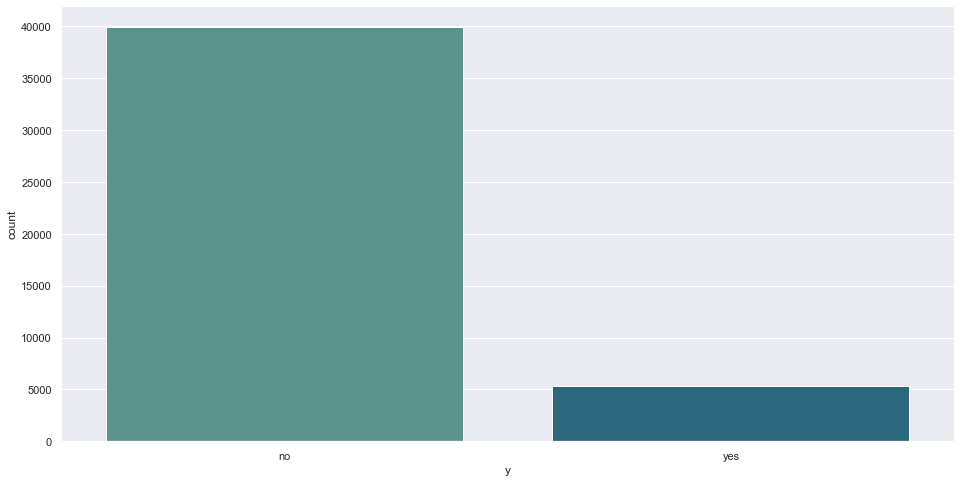

In [470]:
# visualize the target variable
g = sns.countplot(bank['y'], palette= "crest")
g.set_xticklabels(['no','yes'])
plt.show()

As we can see the target is unbalanced so we have to have that in mind to apply the Classification method

#### Looking for other relationships

<AxesSubplot:>

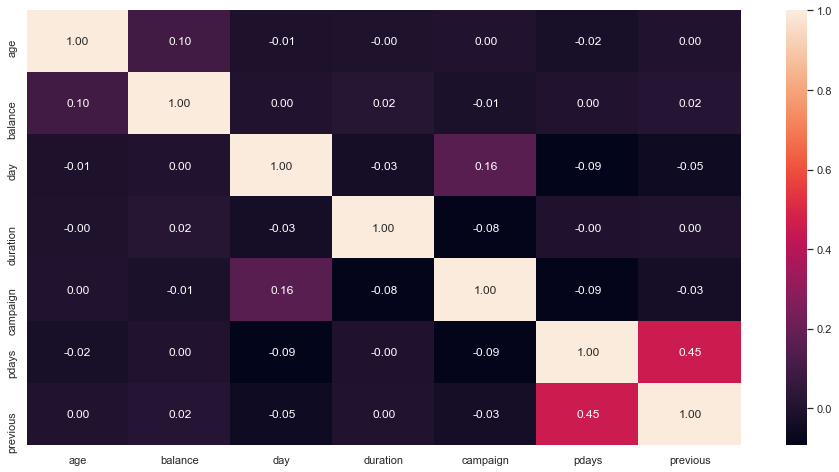

In [183]:
#We want to see how is the general correlation between variables, we use a heatmap
sns.heatmap(df.corr(), annot=True, fmt= '.2f')


### 3. Preparing the  Data set to apply Machine Learning

#### What to do with nulls and unknowns?
We decided to leave both nulls and unknowns because there are not significant in any case.

#### Should we drop any columns?
We will drop "previous" and "default", because they don't seem to aport much to our evaluation.
We will drop also "duration" because that's a variable that we can just know after we made the contact and if the contact fail will end in a "no" for the target which could confused the classification method. 

### 4. Feature engineering

#### What transformations should we made on the variables?
Since we have some categorical variables we have to get transform them to numerical so we can actually run that information on the program

In [611]:
df= pd.read_csv((r"db/bankk.csv"))

df['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

df['education'].replace(['primary' , 'secondary', 'tertiary', 'unknown'], [1, 2, 3, 4], inplace=True)

df['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)

df['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

df['contact'].replace(['cellular', 'telephone', 'unknown'],[1, 2, 3], inplace=True)

df['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

df['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

df['y'].replace(['yes', 'no'],[1, 2], inplace=True)

df = df.drop(df.columns[[5,10, 12,15]], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   housing    45211 non-null  int64
 6   loan       45211 non-null  int64
 7   contact    45211 non-null  int64
 8   day        45211 non-null  int64
 9   duration   45211 non-null  int64
 10  pdays      45211 non-null  int64
 11  previous   45211 non-null  int64
 12  y          45211 non-null  int64
dtypes: int64(13)
memory usage: 4.5 MB


### 5. Splitting the data and training models
We need to split the data between traing and testing, we will use sklearn module for this and we will use 80% for training and 20% for testing 

After splitting we will try different classification methods and we will compare the confusion matrix and scores to determine whitch one works better for our data.


In [592]:
from sklearn.model_selection import train_test_split
# set apparent temperature as target
columns_value = df.columns
index = np.argwhere(columns_value == 'y')
columns_value_new = np.delete(columns_value, index)
data = pd.DataFrame(df, columns=columns_value_new)
# target as Y
selected_columns = ['y']
y_true = df[selected_columns].copy()
# X as indipendent 
X = data
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(36168, 12) (36168, 1)
(9043, 12) (9043, 1)


In [593]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,day,duration,pdays,previous
20503,54,3,1,2,2,2,2,1,12,100,-1,0
18457,56,7,1,2,2,2,2,2,31,119,-1,0
23047,41,5,1,3,2,2,2,1,26,428,-1,0
8745,33,4,2,2,2,1,2,3,4,1141,-1,0
9501,49,1,3,2,2,2,2,3,6,415,-1,0


In [594]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [595]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[ 221  851]
 [ 149 7822]]
89.0


In [596]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') 
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[ 453  619]
 [ 711 7260]]
85.0


In [598]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[ 289  783]
 [ 729 7242]]
83.0


In [599]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[ 414  658]
 [ 312 7659]]
89.0


In [604]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[ 426  646]
 [ 516 7455]]
87.0


In [606]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[ 383  689]
 [ 245 7726]]
90.0


In [610]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine', 'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, LOGCV, GAUSIAN,GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
5,Gradient Boosting,0.898115
0,Random Forest Classifier,0.897755
3,Logistic Model,0.891092
4,Gausian NB,0.873313
1,Decision Tree Classifier,0.859737
2,Support Vector Machine,0.839333


### Conclusions:

#### The best models to use as a classification model for this data are Gradient Boosting and Random forest Classifier.